# Importing Important Libraries

In [2]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting graphs


# Importiing Caliform=nia dataset

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
data = fetch_california_housing()

In [6]:
# Convert the dataset into a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

In [7]:
# Rename 'MedHouseValue' column to 'Price' as the target variable
df['Price'] = data.target

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 1:32
## Multicolinearity : 
- When one feature is explained by all other features(more than 2)
- When there are only two features in the dataset we can determine the colinearity by correlation matrix , Heatmap- 
When there are more than two features in the dataset then we can determine the colinearity by Variance Inflation factor ( VIF , Cluster Map

# 3:00
### Correlation Matrix 
- Determining the Correation between the different features in the df
- Creating corelation matric and then visuaizing it on a heat map for the better understanding 

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     Price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

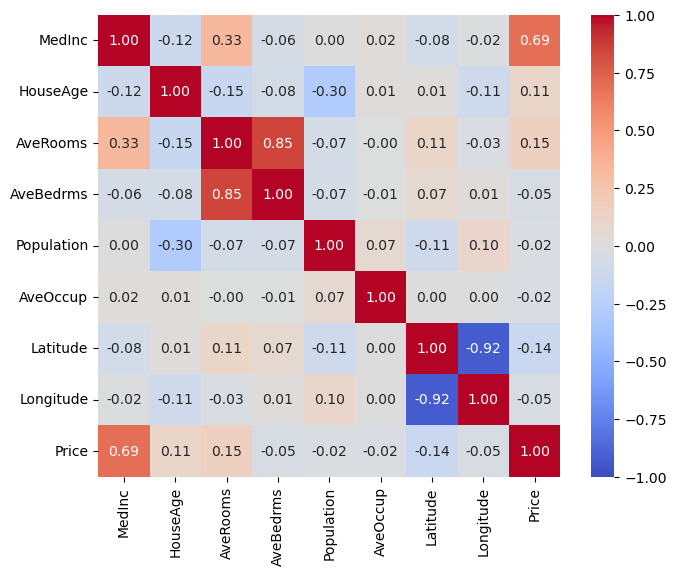

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True , vmax=1, vmin=-1)

# Display the plot
plt.show()

### Interpretation :
- We can confirm that MedInc has the strongest Positive corelation with the Price 
- Other than MedINC , HouseAge and AvgRooms have the moderate correlation with Price as compared to rest of the other Features

### Check for the Multicoliearity:
- House Age has moderate negative correlation with Population
- Avg Rooms has Strong postive crrealtion with AvgBedrooms
- Latitude has Strong negative correaltion with Longitude
    

### So Yes Multicolinearity exists 

# 10:00 VIF for Multicolinearity
-  As there are more than two features in the dataset we should use VIF score to determine the mulicolineatiy
-  Features with VIF scores higher than 10 should e dropped one at a time and again determine the change in the VIF scores of all oter features
  

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the target variable 'Price' for VIF calculation
X = df.drop('Price', axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)


      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


## Dropping Longitude column first

In [19]:
# Drop 'Longitude' feature first
df_dropped = df.drop('Longitude', axis=1)

# Re calculating the VIF Score

In [21]:
# Recalculate VIF for remaining features
X_dropped = df_dropped.drop('Price', axis=1)

# Calculate VIF for each feature
vif_data_dropped = pd.DataFrame()
vif_data_dropped["Feature"] = X_dropped.columns
vif_data_dropped["VIF"] = [variance_inflation_factor(X_dropped.values, i) for i in range(X_dropped.shape[1])]

# Display the new VIF data
print(vif_data_dropped)

      Feature        VIF
0      MedInc   9.865861
1    HouseAge   6.880512
2    AveRooms  42.192223
3   AveBedrms  39.768396
4  Population   2.793169
5    AveOccup   1.094908
6    Latitude  22.498755


# Dropping the HauseAge Column 

In [23]:
# Drop 'HouseAge' feature from X_dropped
X_dropped = X_dropped.drop('HouseAge', axis=1)

# Recalculate VIF for the remaining features
vif_data_dropped_houseage = pd.DataFrame()
vif_data_dropped_houseage["Feature"] = X_dropped.columns
vif_data_dropped_houseage["VIF"] = [variance_inflation_factor(X_dropped.values, i) for i in range(X_dropped.shape[1])]

# Display the new VIF data
print(vif_data_dropped_houseage)


      Feature        VIF
0      MedInc   9.828015
1    AveRooms  40.844454
2   AveBedrms  39.110576
3  Population   2.563463
4    AveOccup   1.093561
5    Latitude  14.093180


### Business Decission :
- Dropping of columns is the decision at business team 
- As Latitude and AvRooms showed strong correaltions with Price we cannot afford drop these two columns though their VIF scores are high 

# Dropping AvgBedrooms and rcalculting th VIF scores

In [40]:
# Drop 'AveBedrms' feature from X_dropped
X_dropped = X_dropped.drop('AveBedrms', axis=1)

# Recalculate VIF for the remaining features
vif_data_dropped_avebedrms = pd.DataFrame()
vif_data_dropped_avebedrms["Feature"] = X_dropped.columns
vif_data_dropped_avebedrms["VIF"] = [variance_inflation_factor(X_dropped.values, i) for i in range(X_dropped.shape[1])]

# Display the new VIF data
print(vif_data_dropped_avebedrms)


      Feature       VIF
0      MedInc  5.635801
1    AveRooms  6.662494
2  Population  2.557088
3    AveOccup  1.093330
4    Latitude  9.345745


# Now the dataset is t=rady to be trained and tested on any maachine learning model
# Thnakoyu